# M2177.003100 Deep Learning <br> Assignment #4 Implementing Conditional Generative Adversarial Nets - part1 MNIST data

Copyright (C) Data Science Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. Written by Jaeyoon Yoo, November 2017

In this notebook, you will learn how to implement conditional Genverative Adversarial Nets (cGANs) <br>
The goal here is to build GANs that draw a digit(MNIST data) given its label. <br> 

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **all parts**, run the *CollectSubmission.sh* script with your **Team number** as input argument. <br>
This will produce a zipped file called *[Your team number].zip*. Please submit this file on ETL. &nbsp;&nbsp; (Usage: ./*CollectSubmission.sh* &nbsp; Team_#)

### Some helpful tutorials and references for assignment #2:
- [1] TensorFlow official tutorials. [[link]](https://www.tensorflow.org/get_started/get_started)
- [2] Stanford CS231n lectures. [[link]](http://cs231n.stanford.edu/)
- [3] Goodfellow, Ian, et al. "Generative adversarial nets." Advances in neural information processing systems. 2014.
- [4] Mirza, Mehdi, and Simon Osindero. "Conditional generative adversarial nets." arXiv preprint arXiv:1411.1784 (2014).
- [5] Radford, Alec, Luke Metz, and Soumith Chintala. "Unsupervised representation learning with deep convolutional generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015).

## 0. Download and load MNIST datasets
The MNIST datasets will be downloaded into the 'data' directory. If you want to change the directory the data is saved in, change mnist_data_dir with where you want. <br>

In [1]:
from download import *
import os
from utils import load_mnist
mnist_data_dir = './data'
prepare_data_dir(mnist_data_dir)
download_mnist(mnist_data_dir)
data_array , data_y = load_mnist(os.path.join(mnist_data_dir,'mnist'))
print(data_array.shape)
print(data_y.shape)

Found MNIST - skip
(70000, 28, 28, 1)
(70000, 10)


## <a name="1"></a> 1. Building a network

In this section, you will implement neural networks for (1) generative model to draw a digit (2) discriminative model to distinguish real image from generated image. You can use some function in *ops.py* or you can make it as you want. Just write the code in whatever way you find most clear.

In [2]:
from ops import conv2d
from ops import lrelu
from ops import de_conv
from ops import fully_connect
from ops import conv_cond_concat
from ops import batch_normal

import tensorflow as tf
import numpy as np

It is time for a generative model. It takes batch size, sample size(the dimension of latent variable or so called *noise*), y_dim(the dimension of label), the output size(should be 28 here) and z,y (Tensorflow Variables for latent variable and label respectively). It should return the image 28x28 output of which each element is in [0,1]. Note that you should define Tensorflow Variables within the variable scope.

You should utilize the label variable y in your model. The simplest way is concatenate the label variable and features or raw image.

In [3]:
def gern_net(batch_size, z , y , sample_size, y_dim, output_size):
    with tf.variable_scope('gen'):
        #### TODO ####
        w_init = tf.contrib.layers.xavier_initializer()
        h = tf.concat([z,y], axis=1)
        h = tf.layers.dense(h, 128, kernel_initializer=w_init, activation=tf.nn.relu)
        h = tf.layers.dense(h, 386, kernel_initializer=w_init, activation=tf.nn.relu)
        
        h = tf.layers.dense(h, output_size * output_size, kernel_initializer=w_init, activation=tf.nn.tanh)
    ####TODO ####
    out = tf.reshape(h, [batch_size, output_size, output_size, 1])
    return out


Now, it's time for a discriminative model. It takes image data and label variable y. It should return the value for which the model is certain that the image is real and its logit. (i.e return the value in [0,1] and its logit). Note that you should define Tensorflow Variables within the variable scope again.

You may use the label variable or not. Here, again concatenating is the simplest way to utilize it.

In [4]:
def dis_net(image_data , y, reuse=False):
    with tf.variable_scope('dis',reuse=reuse):
        #### TODO ####
        batch_size = image_data.shape[0]
        w_init = tf.contrib.layers.xavier_initializer()
        
        h = tf.concat([tf.reshape(image_data, [batch_size, -1]), y], axis=1)
        h = tf.layers.dense(h, 128, kernel_initializer=w_init, activation=tf.nn.leaky_relu)
        h = tf.layers.dense(h, 256, kernel_initializer=w_init, activation=tf.nn.leaky_relu)
        
        h = tf.layers.dense(h, 1, kernel_initializer=w_init)
    #### TODO ####
    out = h
    return tf.nn.sigmoid(out), out


## <a name="2"></a> 2. Build a main part and train

In this section, you will implement the main part. You should define the loss function for each model(TODO part). Then run the code and check the model draws a digit for given label.

When you are done, run the following to check your implementations.

Following code will make 'samples_for_test' directory that resulting image will be saved in. You can change the directory as you want.

Also, you can change all other hyperparameters such as learning rate, batch size. But be sure to define **batch size bigger than 100**.

In [5]:
from utils import load_mnist
from utils import save_images
from utils import vis_square
from utils import sample_label
from utils import getNext_batch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os

learning_rate = 0.0002
batch_size = 128
EPOCH = 50
loss_step    = 50
display_step = 50
sample_size = 100
y_dim = 10
channel = 1
output_size = 28
sample_dir = 'samples_for_test'

if os.path.exists(sample_dir) == False:
    os.makedirs(sample_dir)

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Define the loss function in the TODO part. Modify only loss part.

Discriminator loss : log[D(x)] + log[1-D(G(z))]
Generator loss     : log[D(G(z)]

If you write the code correctly and run the code, it will display 10x10 images(each row shows one of the number). 

Also, it will save the generated images in the 'sample_dir' directory. So if you want to see it, check that directory.

**Please be sure that you ran the above codes**.

EPOCH 0 step 50: D: loss = 1.4300964 G: loss=0.4446338 
EPOCH 0 step 100: D: loss = 1.5335977 G: loss=0.5661117 
EPOCH 0 step 150: D: loss = 1.1507068 G: loss=0.7676783 
EPOCH 0 step 200: D: loss = 1.3172021 G: loss=0.6581540 
EPOCH 0 step 250: D: loss = 1.4456680 G: loss=0.6932001 
EPOCH 0 step 300: D: loss = 1.1924379 G: loss=0.8507141 
EPOCH 0 step 350: D: loss = 1.4305148 G: loss=0.7045552 
EPOCH 0 step 400: D: loss = 1.3817712 G: loss=0.7331080 
EPOCH 0 step 450: D: loss = 1.1866937 G: loss=0.8075888 
EPOCH 0 step 500: D: loss = 1.3313265 G: loss=0.7415354 


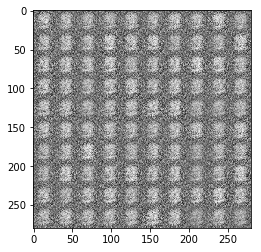

EPOCH 1 step 550: D: loss = 1.1386153 G: loss=0.7887988 
EPOCH 1 step 600: D: loss = 1.2267979 G: loss=0.7012136 
EPOCH 1 step 650: D: loss = 0.9848269 G: loss=0.8231885 
EPOCH 1 step 700: D: loss = 1.1200874 G: loss=0.8329208 
EPOCH 1 step 750: D: loss = 1.0003159 G: loss=0.8735506 
EPOCH 1 step 800: D: loss = 1.2497743 G: loss=0.7731231 
EPOCH 1 step 850: D: loss = 1.3023841 G: loss=0.7780480 
EPOCH 1 step 900: D: loss = 1.1617746 G: loss=0.7940335 
EPOCH 1 step 950: D: loss = 1.1912546 G: loss=0.7982103 
EPOCH 1 step 1000: D: loss = 0.9842110 G: loss=0.9744967 
EPOCH 1 step 1050: D: loss = 1.0466115 G: loss=0.9258727 


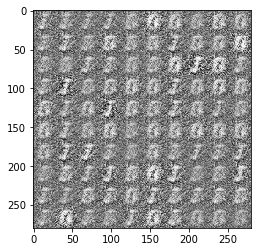

EPOCH 2 step 1100: D: loss = 0.9972368 G: loss=0.9866235 
EPOCH 2 step 1150: D: loss = 1.0604863 G: loss=0.9423972 
EPOCH 2 step 1200: D: loss = 1.0601795 G: loss=0.8765313 
EPOCH 2 step 1250: D: loss = 1.1281695 G: loss=0.8510842 
EPOCH 2 step 1300: D: loss = 1.2022524 G: loss=0.8250353 
EPOCH 2 step 1350: D: loss = 1.1022515 G: loss=0.9293189 
EPOCH 2 step 1400: D: loss = 1.1735349 G: loss=0.8608598 
EPOCH 2 step 1450: D: loss = 1.0508490 G: loss=0.9286579 
EPOCH 2 step 1500: D: loss = 1.0264431 G: loss=0.9971389 
EPOCH 2 step 1550: D: loss = 0.9524624 G: loss=0.9757618 
EPOCH 2 step 1600: D: loss = 0.9801112 G: loss=1.0307806 


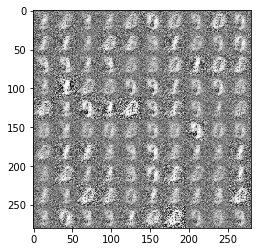

EPOCH 3 step 1650: D: loss = 0.9729544 G: loss=1.0331366 
EPOCH 3 step 1700: D: loss = 1.1277500 G: loss=0.8696494 
EPOCH 3 step 1750: D: loss = 0.9857705 G: loss=0.9476746 
EPOCH 3 step 1800: D: loss = 1.0992894 G: loss=0.9805113 
EPOCH 3 step 1850: D: loss = 0.9108797 G: loss=1.0881224 
EPOCH 3 step 1900: D: loss = 1.1075760 G: loss=0.9621047 
EPOCH 3 step 1950: D: loss = 0.9301034 G: loss=1.1323190 
EPOCH 3 step 2000: D: loss = 0.9419846 G: loss=1.1272978 
EPOCH 3 step 2050: D: loss = 0.9383329 G: loss=1.0421693 
EPOCH 3 step 2100: D: loss = 0.9928796 G: loss=1.0178008 
EPOCH 3 step 2150: D: loss = 0.9579451 G: loss=1.1178846 


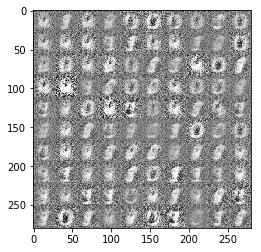

EPOCH 4 step 2200: D: loss = 0.9778244 G: loss=0.9860667 
EPOCH 4 step 2250: D: loss = 1.0869017 G: loss=0.9931433 
EPOCH 4 step 2300: D: loss = 1.0533941 G: loss=0.9904097 
EPOCH 4 step 2350: D: loss = 0.9548428 G: loss=1.0315542 
EPOCH 4 step 2400: D: loss = 0.9475534 G: loss=1.1199898 
EPOCH 4 step 2450: D: loss = 0.9982346 G: loss=1.0922064 
EPOCH 4 step 2500: D: loss = 0.9969768 G: loss=1.0558453 
EPOCH 4 step 2550: D: loss = 0.9359763 G: loss=1.0324688 
EPOCH 4 step 2600: D: loss = 0.9043260 G: loss=1.1178086 
EPOCH 4 step 2650: D: loss = 0.9208590 G: loss=1.1143086 
EPOCH 4 step 2700: D: loss = 0.8363467 G: loss=1.2094399 


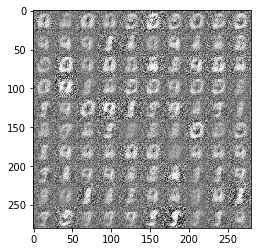

EPOCH 5 step 2750: D: loss = 0.9359533 G: loss=1.1317184 
EPOCH 5 step 2800: D: loss = 0.9359392 G: loss=1.1479607 
EPOCH 5 step 2850: D: loss = 1.1303805 G: loss=1.0418174 
EPOCH 5 step 2900: D: loss = 1.1244280 G: loss=1.0390061 
EPOCH 5 step 2950: D: loss = 1.1187087 G: loss=0.9224100 
EPOCH 5 step 3000: D: loss = 1.1587259 G: loss=1.0327079 
EPOCH 5 step 3050: D: loss = 0.9665873 G: loss=1.0907210 
EPOCH 5 step 3100: D: loss = 1.0854058 G: loss=0.9881487 
EPOCH 5 step 3150: D: loss = 1.2276502 G: loss=0.8553078 
EPOCH 5 step 3200: D: loss = 1.1553838 G: loss=0.8941960 
EPOCH 5 step 3250: D: loss = 1.2013059 G: loss=0.8764516 


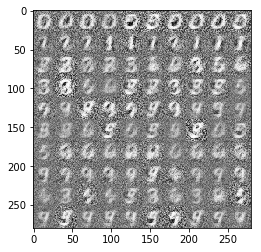

EPOCH 6 step 3300: D: loss = 1.3698372 G: loss=0.7634376 
EPOCH 6 step 3350: D: loss = 1.2056532 G: loss=0.9036032 
EPOCH 6 step 3400: D: loss = 1.1424775 G: loss=0.8799392 
EPOCH 6 step 3450: D: loss = 1.0949355 G: loss=0.9951000 
EPOCH 6 step 3500: D: loss = 1.1122394 G: loss=0.9829288 
EPOCH 6 step 3550: D: loss = 1.1180985 G: loss=0.9536413 
EPOCH 6 step 3600: D: loss = 1.1270237 G: loss=0.8922703 
EPOCH 6 step 3650: D: loss = 1.1016178 G: loss=0.8758852 
EPOCH 6 step 3700: D: loss = 1.0352535 G: loss=0.9803429 
EPOCH 6 step 3750: D: loss = 1.0095828 G: loss=0.9873509 
EPOCH 6 step 3800: D: loss = 1.0170085 G: loss=0.9568109 


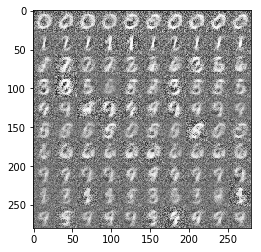

EPOCH 7 step 3850: D: loss = 1.0353949 G: loss=0.9874981 
EPOCH 7 step 3900: D: loss = 1.1102924 G: loss=0.8809770 
EPOCH 7 step 3950: D: loss = 1.0831720 G: loss=1.0503223 
EPOCH 7 step 4000: D: loss = 1.1377447 G: loss=0.8780974 
EPOCH 7 step 4050: D: loss = 1.1663715 G: loss=0.9629064 
EPOCH 7 step 4100: D: loss = 1.1935658 G: loss=0.8556631 
EPOCH 7 step 4150: D: loss = 1.1823256 G: loss=0.9145155 
EPOCH 7 step 4200: D: loss = 1.2720280 G: loss=0.8295581 
EPOCH 7 step 4250: D: loss = 1.1763723 G: loss=0.9013150 
EPOCH 7 step 4300: D: loss = 1.2479671 G: loss=0.8643972 
EPOCH 7 step 4350: D: loss = 1.3208923 G: loss=0.7871109 


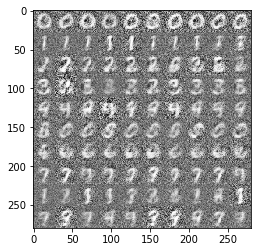

EPOCH 8 step 4400: D: loss = 1.3253587 G: loss=0.8024780 
EPOCH 8 step 4450: D: loss = 1.2676607 G: loss=0.7848076 
EPOCH 8 step 4500: D: loss = 1.2321420 G: loss=0.8382489 
EPOCH 8 step 4550: D: loss = 1.2541449 G: loss=0.8562079 
EPOCH 8 step 4600: D: loss = 1.2469261 G: loss=0.8929719 
EPOCH 8 step 4650: D: loss = 1.2999585 G: loss=0.8283828 
EPOCH 8 step 4700: D: loss = 1.1508408 G: loss=0.8562951 
EPOCH 8 step 4750: D: loss = 1.1972208 G: loss=0.8610850 
EPOCH 8 step 4800: D: loss = 1.1957934 G: loss=0.8577074 
EPOCH 8 step 4850: D: loss = 1.3535056 G: loss=0.7714126 
EPOCH 8 step 4900: D: loss = 1.2355220 G: loss=0.8068310 


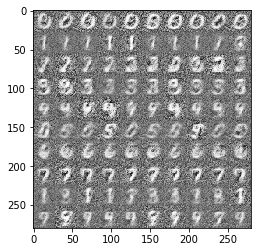

EPOCH 9 step 4950: D: loss = 1.2679834 G: loss=0.8607396 
EPOCH 9 step 5000: D: loss = 1.2038332 G: loss=0.8371166 
EPOCH 9 step 5050: D: loss = 1.2638705 G: loss=0.7934051 
EPOCH 9 step 5100: D: loss = 1.3027184 G: loss=0.7589540 
EPOCH 9 step 5150: D: loss = 1.2025650 G: loss=0.8549083 
EPOCH 9 step 5200: D: loss = 1.2183652 G: loss=0.8006478 
EPOCH 9 step 5250: D: loss = 1.2959228 G: loss=0.7892572 
EPOCH 9 step 5300: D: loss = 1.1453689 G: loss=0.8502068 
EPOCH 9 step 5350: D: loss = 1.2225662 G: loss=0.7965999 
EPOCH 9 step 5400: D: loss = 1.2824028 G: loss=0.7765818 
EPOCH 9 step 5450: D: loss = 1.2546804 G: loss=0.8292753 


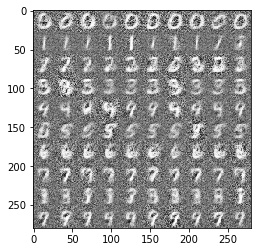

EPOCH 10 step 5500: D: loss = 1.2687378 G: loss=0.7759302 
EPOCH 10 step 5550: D: loss = 1.2511883 G: loss=0.7992224 
EPOCH 10 step 5600: D: loss = 1.2781397 G: loss=0.7800819 
EPOCH 10 step 5650: D: loss = 1.2592181 G: loss=0.7951235 
EPOCH 10 step 5700: D: loss = 1.2292104 G: loss=0.7923262 
EPOCH 10 step 5750: D: loss = 1.1944499 G: loss=0.8084203 
EPOCH 10 step 5800: D: loss = 1.2652884 G: loss=0.8592804 
EPOCH 10 step 5850: D: loss = 1.2301972 G: loss=0.8364169 
EPOCH 10 step 5900: D: loss = 1.2522895 G: loss=0.7345718 
EPOCH 10 step 5950: D: loss = 1.2364688 G: loss=0.7207186 
EPOCH 10 step 6000: D: loss = 1.2665696 G: loss=0.8522800 


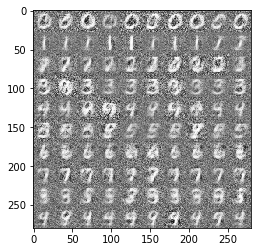

EPOCH 11 step 6050: D: loss = 1.1535769 G: loss=0.8770396 
EPOCH 11 step 6100: D: loss = 1.2402803 G: loss=0.8411845 
EPOCH 11 step 6150: D: loss = 1.2038345 G: loss=0.8265173 
EPOCH 11 step 6200: D: loss = 1.3063483 G: loss=0.7399513 
EPOCH 11 step 6250: D: loss = 1.2262540 G: loss=0.8375492 
EPOCH 11 step 6300: D: loss = 1.3586414 G: loss=0.7791658 
EPOCH 11 step 6350: D: loss = 1.2495320 G: loss=0.7952681 
EPOCH 11 step 6400: D: loss = 1.2397487 G: loss=0.8466998 
EPOCH 11 step 6450: D: loss = 1.2034481 G: loss=0.8050961 
EPOCH 11 step 6500: D: loss = 1.2001531 G: loss=0.8493310 
EPOCH 11 step 6550: D: loss = 1.2451241 G: loss=0.7768131 


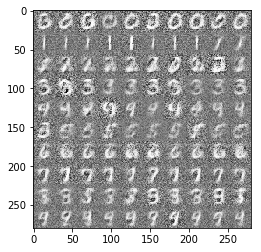

EPOCH 12 step 6600: D: loss = 1.2776220 G: loss=0.7834796 
EPOCH 12 step 6650: D: loss = 1.2831166 G: loss=0.7091252 
EPOCH 12 step 6700: D: loss = 1.2708950 G: loss=0.8157387 
EPOCH 12 step 6750: D: loss = 1.2654421 G: loss=0.8319544 
EPOCH 12 step 6800: D: loss = 1.3267123 G: loss=0.8824485 
EPOCH 12 step 6850: D: loss = 1.2336242 G: loss=0.7886936 
EPOCH 12 step 6900: D: loss = 1.2000877 G: loss=0.8820914 
EPOCH 12 step 6950: D: loss = 1.2853861 G: loss=0.7710043 
EPOCH 12 step 7000: D: loss = 1.3008292 G: loss=0.7164803 
EPOCH 12 step 7050: D: loss = 1.3166130 G: loss=0.7779534 


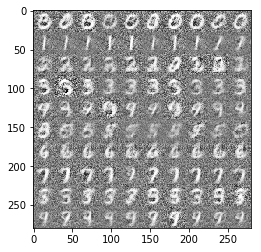

EPOCH 13 step 7100: D: loss = 1.2741865 G: loss=0.8268561 
EPOCH 13 step 7150: D: loss = 1.3446231 G: loss=0.7762693 
EPOCH 13 step 7200: D: loss = 1.2973653 G: loss=0.7730476 
EPOCH 13 step 7250: D: loss = 1.3041916 G: loss=0.7948118 
EPOCH 13 step 7300: D: loss = 1.2752622 G: loss=0.7997347 
EPOCH 13 step 7350: D: loss = 1.2841411 G: loss=0.7286228 
EPOCH 13 step 7400: D: loss = 1.2555492 G: loss=0.7852127 
EPOCH 13 step 7450: D: loss = 1.2341746 G: loss=0.8021017 
EPOCH 13 step 7500: D: loss = 1.2647212 G: loss=0.7648433 
EPOCH 13 step 7550: D: loss = 1.2891066 G: loss=0.7660247 
EPOCH 13 step 7600: D: loss = 1.3207394 G: loss=0.7603890 


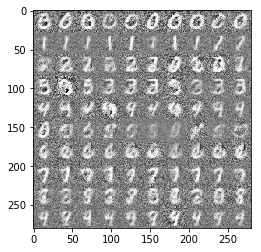

EPOCH 14 step 7650: D: loss = 1.3023807 G: loss=0.7528302 
EPOCH 14 step 7700: D: loss = 1.2387962 G: loss=0.8495600 
EPOCH 14 step 7750: D: loss = 1.3431773 G: loss=0.6912618 
EPOCH 14 step 7800: D: loss = 1.2146707 G: loss=0.8079397 
EPOCH 14 step 7850: D: loss = 1.2569859 G: loss=0.8714142 
EPOCH 14 step 7900: D: loss = 1.2896990 G: loss=0.7949731 
EPOCH 14 step 7950: D: loss = 1.2704000 G: loss=0.7939503 
EPOCH 14 step 8000: D: loss = 1.2258695 G: loss=0.9012858 
EPOCH 14 step 8050: D: loss = 1.2754385 G: loss=0.8073324 
EPOCH 14 step 8100: D: loss = 1.2828257 G: loss=0.7510337 
EPOCH 14 step 8150: D: loss = 1.2296100 G: loss=0.7831956 


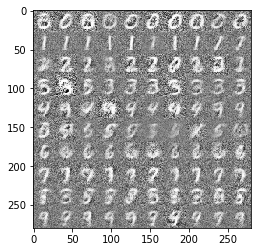

EPOCH 15 step 8200: D: loss = 1.2833457 G: loss=0.7791535 
EPOCH 15 step 8250: D: loss = 1.2601933 G: loss=0.7961856 
EPOCH 15 step 8300: D: loss = 1.3228745 G: loss=0.7614865 
EPOCH 15 step 8350: D: loss = 1.2343657 G: loss=0.8029623 
EPOCH 15 step 8400: D: loss = 1.3034314 G: loss=0.7838429 
EPOCH 15 step 8450: D: loss = 1.2648008 G: loss=0.7743815 
EPOCH 15 step 8500: D: loss = 1.2581797 G: loss=0.7970035 
EPOCH 15 step 8550: D: loss = 1.3002810 G: loss=0.8588699 
EPOCH 15 step 8600: D: loss = 1.3279539 G: loss=0.7787579 
EPOCH 15 step 8650: D: loss = 1.2327809 G: loss=0.7647434 
EPOCH 15 step 8700: D: loss = 1.2617527 G: loss=0.7597908 


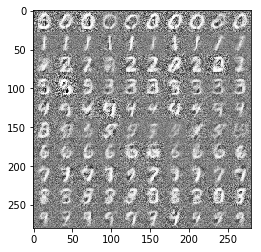

EPOCH 16 step 8750: D: loss = 1.3044434 G: loss=0.7632303 
EPOCH 16 step 8800: D: loss = 1.2585043 G: loss=0.8083021 
EPOCH 16 step 8850: D: loss = 1.3136251 G: loss=0.8356955 
EPOCH 16 step 8900: D: loss = 1.3423986 G: loss=0.7311568 
EPOCH 16 step 8950: D: loss = 1.2544086 G: loss=0.8495101 
EPOCH 16 step 9000: D: loss = 1.2922237 G: loss=0.7787645 
EPOCH 16 step 9050: D: loss = 1.2420475 G: loss=0.8125269 
EPOCH 16 step 9100: D: loss = 1.3102210 G: loss=0.7615718 
EPOCH 16 step 9150: D: loss = 1.3138872 G: loss=0.7871807 
EPOCH 16 step 9200: D: loss = 1.2506378 G: loss=0.8984976 
EPOCH 16 step 9250: D: loss = 1.2805183 G: loss=0.7479720 


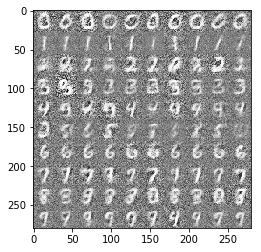

EPOCH 17 step 9300: D: loss = 1.3118885 G: loss=0.7907684 
EPOCH 17 step 9350: D: loss = 1.3503745 G: loss=0.7627310 
EPOCH 17 step 9400: D: loss = 1.3186333 G: loss=0.7373721 
EPOCH 17 step 9450: D: loss = 1.3125646 G: loss=0.8261437 
EPOCH 17 step 9500: D: loss = 1.3159486 G: loss=0.7495962 
EPOCH 17 step 9550: D: loss = 1.3388638 G: loss=0.7628013 
EPOCH 17 step 9600: D: loss = 1.3222408 G: loss=0.7734778 
EPOCH 17 step 9650: D: loss = 1.3003494 G: loss=0.7315328 
EPOCH 17 step 9700: D: loss = 1.2865250 G: loss=0.7373602 
EPOCH 17 step 9750: D: loss = 1.3420995 G: loss=0.6986977 
EPOCH 17 step 9800: D: loss = 1.3507102 G: loss=0.7516534 


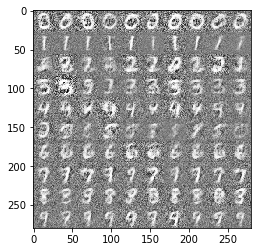

EPOCH 18 step 9850: D: loss = 1.3054334 G: loss=0.7088268 
EPOCH 18 step 9900: D: loss = 1.3076059 G: loss=0.7367649 
EPOCH 18 step 9950: D: loss = 1.3156879 G: loss=0.7929447 
EPOCH 18 step 10000: D: loss = 1.3094881 G: loss=0.7679980 
EPOCH 18 step 10050: D: loss = 1.2945842 G: loss=0.8516631 
EPOCH 18 step 10100: D: loss = 1.3051367 G: loss=0.7225291 
EPOCH 18 step 10150: D: loss = 1.2704232 G: loss=0.7731754 
EPOCH 18 step 10200: D: loss = 1.3094604 G: loss=0.7427233 
EPOCH 18 step 10250: D: loss = 1.3562384 G: loss=0.7739766 
EPOCH 18 step 10300: D: loss = 1.3468604 G: loss=0.7071364 
EPOCH 18 step 10350: D: loss = 1.2806690 G: loss=0.7340893 


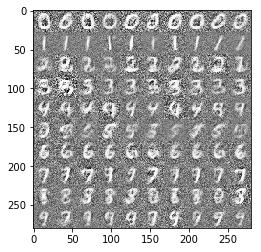

EPOCH 19 step 10400: D: loss = 1.3434417 G: loss=0.7724924 
EPOCH 19 step 10450: D: loss = 1.2873799 G: loss=0.8157623 
EPOCH 19 step 10500: D: loss = 1.2698526 G: loss=0.7849011 
EPOCH 19 step 10550: D: loss = 1.3245034 G: loss=0.7059644 
EPOCH 19 step 10600: D: loss = 1.2940357 G: loss=0.7855541 
EPOCH 19 step 10650: D: loss = 1.3627969 G: loss=0.6932727 
EPOCH 19 step 10700: D: loss = 1.2407134 G: loss=0.8603165 
EPOCH 19 step 10750: D: loss = 1.3232027 G: loss=0.6814079 
EPOCH 19 step 10800: D: loss = 1.2883887 G: loss=0.8141189 
EPOCH 19 step 10850: D: loss = 1.3137645 G: loss=0.7526555 
EPOCH 19 step 10900: D: loss = 1.2982928 G: loss=0.7874308 


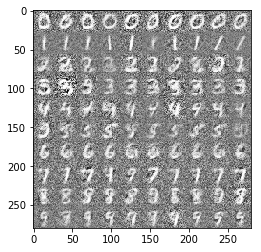

EPOCH 20 step 10950: D: loss = 1.3586648 G: loss=0.7658617 
EPOCH 20 step 11000: D: loss = 1.3073721 G: loss=0.7395935 
EPOCH 20 step 11050: D: loss = 1.2835138 G: loss=0.7699147 
EPOCH 20 step 11100: D: loss = 1.3479159 G: loss=0.6926174 
EPOCH 20 step 11150: D: loss = 1.3101757 G: loss=0.7217640 
EPOCH 20 step 11200: D: loss = 1.3564928 G: loss=0.7489309 
EPOCH 20 step 11250: D: loss = 1.2751374 G: loss=0.7341143 
EPOCH 20 step 11300: D: loss = 1.2774625 G: loss=0.8090155 
EPOCH 20 step 11350: D: loss = 1.3348755 G: loss=0.7439247 
EPOCH 20 step 11400: D: loss = 1.2837290 G: loss=0.7579150 
EPOCH 20 step 11450: D: loss = 1.3521471 G: loss=0.6833723 


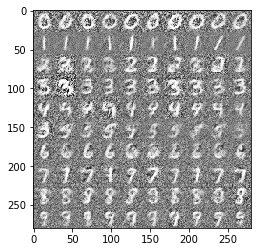

EPOCH 21 step 11500: D: loss = 1.2900515 G: loss=0.7605752 
EPOCH 21 step 11550: D: loss = 1.3530375 G: loss=0.7404914 
EPOCH 21 step 11600: D: loss = 1.3273160 G: loss=0.7706664 
EPOCH 21 step 11650: D: loss = 1.3404909 G: loss=0.7796352 
EPOCH 21 step 11700: D: loss = 1.3123708 G: loss=0.7741649 
EPOCH 21 step 11750: D: loss = 1.3153651 G: loss=0.7818777 
EPOCH 21 step 11800: D: loss = 1.3879414 G: loss=0.7353061 
EPOCH 21 step 11850: D: loss = 1.2863973 G: loss=0.7752723 
EPOCH 21 step 11900: D: loss = 1.3294733 G: loss=0.7739238 
EPOCH 21 step 11950: D: loss = 1.3560216 G: loss=0.7221535 
EPOCH 21 step 12000: D: loss = 1.3493655 G: loss=0.7404088 


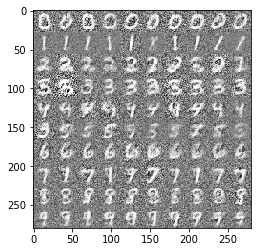

EPOCH 22 step 12050: D: loss = 1.3464363 G: loss=0.7228211 
EPOCH 22 step 12100: D: loss = 1.3277597 G: loss=0.7405294 
EPOCH 22 step 12150: D: loss = 1.2986244 G: loss=0.7695311 
EPOCH 22 step 12200: D: loss = 1.3527948 G: loss=0.7867765 
EPOCH 22 step 12250: D: loss = 1.3192821 G: loss=0.7486684 
EPOCH 22 step 12300: D: loss = 1.3838114 G: loss=0.8015577 
EPOCH 22 step 12350: D: loss = 1.3481665 G: loss=0.7511734 
EPOCH 22 step 12400: D: loss = 1.3822663 G: loss=0.7260988 
EPOCH 22 step 12450: D: loss = 1.3446825 G: loss=0.7537552 
EPOCH 22 step 12500: D: loss = 1.3901355 G: loss=0.6500273 
EPOCH 22 step 12550: D: loss = 1.3095686 G: loss=0.8177775 


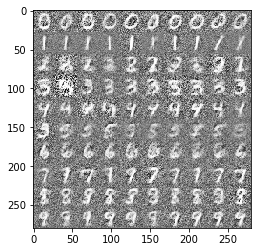

EPOCH 23 step 12600: D: loss = 1.2829416 G: loss=0.7296369 
EPOCH 23 step 12650: D: loss = 1.3071597 G: loss=0.7784208 
EPOCH 23 step 12700: D: loss = 1.2995796 G: loss=0.7389949 
EPOCH 23 step 12750: D: loss = 1.3639400 G: loss=0.7296861 
EPOCH 23 step 12800: D: loss = 1.3551546 G: loss=0.7253764 
EPOCH 23 step 12850: D: loss = 1.3388979 G: loss=0.7089264 
EPOCH 23 step 12900: D: loss = 1.3070412 G: loss=0.7468455 
EPOCH 23 step 12950: D: loss = 1.3542459 G: loss=0.6960974 
EPOCH 23 step 13000: D: loss = 1.3703648 G: loss=0.7428265 
EPOCH 23 step 13050: D: loss = 1.3129187 G: loss=0.7794920 
EPOCH 23 step 13100: D: loss = 1.3715441 G: loss=0.7535595 


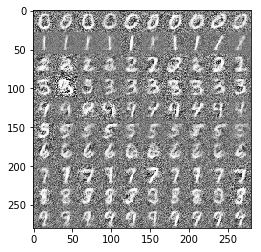

EPOCH 24 step 13150: D: loss = 1.3474110 G: loss=0.7379334 
EPOCH 24 step 13200: D: loss = 1.3857156 G: loss=0.7623455 
EPOCH 24 step 13250: D: loss = 1.3740934 G: loss=0.7214497 
EPOCH 24 step 13300: D: loss = 1.3867000 G: loss=0.7268234 
EPOCH 24 step 13350: D: loss = 1.3468189 G: loss=0.7036601 
EPOCH 24 step 13400: D: loss = 1.3632748 G: loss=0.7061427 
EPOCH 24 step 13450: D: loss = 1.3628657 G: loss=0.7095938 
EPOCH 24 step 13500: D: loss = 1.3460124 G: loss=0.7804278 
EPOCH 24 step 13550: D: loss = 1.3360960 G: loss=0.7501975 
EPOCH 24 step 13600: D: loss = 1.3181493 G: loss=0.7809491 
EPOCH 24 step 13650: D: loss = 1.3107165 G: loss=0.7952019 


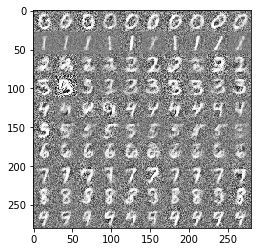

EPOCH 25 step 13700: D: loss = 1.3026977 G: loss=0.7737082 
EPOCH 25 step 13750: D: loss = 1.3530155 G: loss=0.7581153 
EPOCH 25 step 13800: D: loss = 1.3164227 G: loss=0.7995248 
EPOCH 25 step 13850: D: loss = 1.3685353 G: loss=0.7033077 
EPOCH 25 step 13900: D: loss = 1.3596338 G: loss=0.7077249 
EPOCH 25 step 13950: D: loss = 1.2797370 G: loss=0.7564167 
EPOCH 25 step 14000: D: loss = 1.3337363 G: loss=0.7058181 
EPOCH 25 step 14050: D: loss = 1.3046646 G: loss=0.6733158 
EPOCH 25 step 14100: D: loss = 1.3473740 G: loss=0.7338099 
EPOCH 25 step 14150: D: loss = 1.3619032 G: loss=0.7555075 


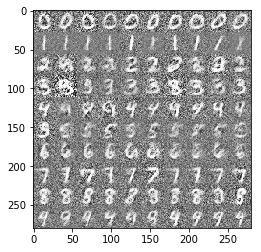

EPOCH 26 step 14200: D: loss = 1.3585362 G: loss=0.6955050 
EPOCH 26 step 14250: D: loss = 1.3200998 G: loss=0.7256873 
EPOCH 26 step 14300: D: loss = 1.3418996 G: loss=0.7264425 
EPOCH 26 step 14350: D: loss = 1.3776560 G: loss=0.6759722 
EPOCH 26 step 14400: D: loss = 1.3272583 G: loss=0.7372496 
EPOCH 26 step 14450: D: loss = 1.3540510 G: loss=0.7290479 
EPOCH 26 step 14500: D: loss = 1.3604796 G: loss=0.7231854 
EPOCH 26 step 14550: D: loss = 1.3465848 G: loss=0.7512534 
EPOCH 26 step 14600: D: loss = 1.3309029 G: loss=0.7197915 
EPOCH 26 step 14650: D: loss = 1.2991166 G: loss=0.7756068 
EPOCH 26 step 14700: D: loss = 1.3549389 G: loss=0.7700824 


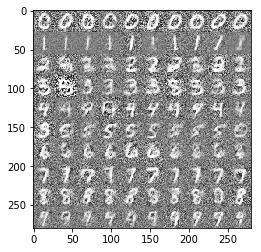

EPOCH 27 step 14750: D: loss = 1.3601433 G: loss=0.7170132 
EPOCH 27 step 14800: D: loss = 1.3573033 G: loss=0.7316490 
EPOCH 27 step 14850: D: loss = 1.3281033 G: loss=0.7771915 
EPOCH 27 step 14900: D: loss = 1.3778007 G: loss=0.6540529 
EPOCH 27 step 14950: D: loss = 1.3705922 G: loss=0.7013549 
EPOCH 27 step 15000: D: loss = 1.3605158 G: loss=0.7455606 
EPOCH 27 step 15050: D: loss = 1.3629720 G: loss=0.6790165 
EPOCH 27 step 15100: D: loss = 1.3561977 G: loss=0.6886772 
EPOCH 27 step 15150: D: loss = 1.3407047 G: loss=0.8180410 
EPOCH 27 step 15200: D: loss = 1.3271729 G: loss=0.7815052 
EPOCH 27 step 15250: D: loss = 1.3772342 G: loss=0.6838245 


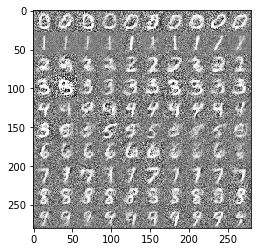

EPOCH 28 step 15300: D: loss = 1.4044944 G: loss=0.6577139 
EPOCH 28 step 15350: D: loss = 1.3146863 G: loss=0.7821617 
EPOCH 28 step 15400: D: loss = 1.3381976 G: loss=0.6959656 
EPOCH 28 step 15450: D: loss = 1.3359388 G: loss=0.8117037 
EPOCH 28 step 15500: D: loss = 1.3489897 G: loss=0.7386039 
EPOCH 28 step 15550: D: loss = 1.3544610 G: loss=0.7376502 
EPOCH 28 step 15600: D: loss = 1.3540225 G: loss=0.7682878 
EPOCH 28 step 15650: D: loss = 1.3611243 G: loss=0.7284710 
EPOCH 28 step 15700: D: loss = 1.3391973 G: loss=0.6934836 
EPOCH 28 step 15750: D: loss = 1.3513921 G: loss=0.6997167 
EPOCH 28 step 15800: D: loss = 1.3241265 G: loss=0.7741734 


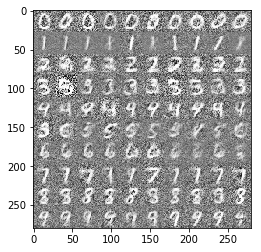

EPOCH 29 step 15850: D: loss = 1.3362125 G: loss=0.8017805 
EPOCH 29 step 15900: D: loss = 1.3648130 G: loss=0.7260594 
EPOCH 29 step 15950: D: loss = 1.3435931 G: loss=0.7663819 
EPOCH 29 step 16000: D: loss = 1.3403425 G: loss=0.8506530 
EPOCH 29 step 16050: D: loss = 1.3384564 G: loss=0.7416348 
EPOCH 29 step 16100: D: loss = 1.3285530 G: loss=0.7979132 
EPOCH 29 step 16150: D: loss = 1.3252450 G: loss=0.7478800 
EPOCH 29 step 16200: D: loss = 1.3373241 G: loss=0.7051732 
EPOCH 29 step 16250: D: loss = 1.2987864 G: loss=0.7675067 
EPOCH 29 step 16300: D: loss = 1.3265388 G: loss=0.7403033 
EPOCH 29 step 16350: D: loss = 1.3448942 G: loss=0.7689903 


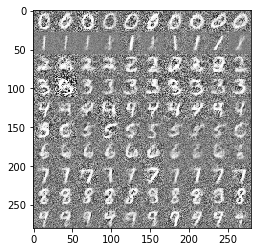

EPOCH 30 step 16400: D: loss = 1.3441943 G: loss=0.7668903 
EPOCH 30 step 16450: D: loss = 1.3333681 G: loss=0.7546418 
EPOCH 30 step 16500: D: loss = 1.3576734 G: loss=0.7243437 
EPOCH 30 step 16550: D: loss = 1.3439224 G: loss=0.7442352 
EPOCH 30 step 16600: D: loss = 1.3512414 G: loss=0.7172893 
EPOCH 30 step 16650: D: loss = 1.3289435 G: loss=0.7259492 
EPOCH 30 step 16700: D: loss = 1.3549912 G: loss=0.7724853 
EPOCH 30 step 16750: D: loss = 1.3534837 G: loss=0.7586539 
EPOCH 30 step 16800: D: loss = 1.3494110 G: loss=0.7591832 
EPOCH 30 step 16850: D: loss = 1.3303638 G: loss=0.6986015 
EPOCH 30 step 16900: D: loss = 1.2960868 G: loss=0.7679979 


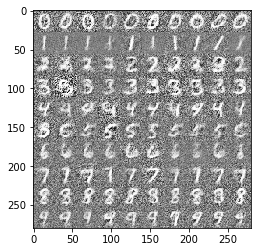

EPOCH 31 step 16950: D: loss = 1.3391569 G: loss=0.6990420 
EPOCH 31 step 17000: D: loss = 1.3010886 G: loss=0.7270933 
EPOCH 31 step 17050: D: loss = 1.3304057 G: loss=0.7074512 
EPOCH 31 step 17100: D: loss = 1.3566662 G: loss=0.6903466 
EPOCH 31 step 17150: D: loss = 1.3071046 G: loss=0.7470651 
EPOCH 31 step 17200: D: loss = 1.3366059 G: loss=0.7679772 
EPOCH 31 step 17250: D: loss = 1.3489417 G: loss=0.7446043 
EPOCH 31 step 17300: D: loss = 1.3222570 G: loss=0.7316230 
EPOCH 31 step 17350: D: loss = 1.3116874 G: loss=0.7067553 
EPOCH 31 step 17400: D: loss = 1.3378205 G: loss=0.7746923 
EPOCH 31 step 17450: D: loss = 1.3132014 G: loss=0.7427186 


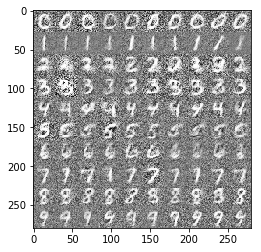

EPOCH 32 step 17500: D: loss = 1.4046674 G: loss=0.6998435 
EPOCH 32 step 17550: D: loss = 1.3374376 G: loss=0.7419474 
EPOCH 32 step 17600: D: loss = 1.3743143 G: loss=0.7685016 
EPOCH 32 step 17650: D: loss = 1.3299576 G: loss=0.7931291 
EPOCH 32 step 17700: D: loss = 1.3561839 G: loss=0.7724233 
EPOCH 32 step 17750: D: loss = 1.4012662 G: loss=0.6672416 
EPOCH 32 step 17800: D: loss = 1.3188462 G: loss=0.7016908 
EPOCH 32 step 17850: D: loss = 1.3666911 G: loss=0.7590500 
EPOCH 32 step 17900: D: loss = 1.3659997 G: loss=0.6864798 
EPOCH 32 step 17950: D: loss = 1.3413218 G: loss=0.7553421 
EPOCH 32 step 18000: D: loss = 1.3641369 G: loss=0.7423997 


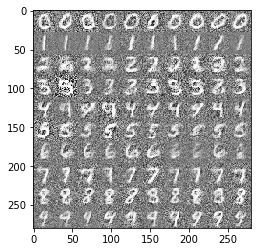

EPOCH 33 step 18050: D: loss = 1.3382274 G: loss=0.7135386 
EPOCH 33 step 18100: D: loss = 1.3309658 G: loss=0.7258803 
EPOCH 33 step 18150: D: loss = 1.3286964 G: loss=0.7551389 
EPOCH 33 step 18200: D: loss = 1.3063726 G: loss=0.7777249 
EPOCH 33 step 18250: D: loss = 1.3737267 G: loss=0.7719048 
EPOCH 33 step 18300: D: loss = 1.3230493 G: loss=0.7287697 
EPOCH 33 step 18350: D: loss = 1.3179159 G: loss=0.7594334 
EPOCH 33 step 18400: D: loss = 1.3414981 G: loss=0.7293901 
EPOCH 33 step 18450: D: loss = 1.3528572 G: loss=0.7240581 
EPOCH 33 step 18500: D: loss = 1.3725226 G: loss=0.6823369 
EPOCH 33 step 18550: D: loss = 1.3012693 G: loss=0.8079718 


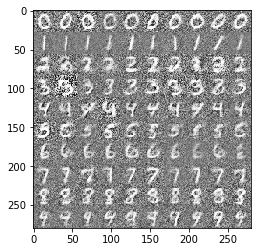

EPOCH 34 step 18600: D: loss = 1.3588490 G: loss=0.7119004 
EPOCH 34 step 18650: D: loss = 1.3343509 G: loss=0.7017152 
EPOCH 34 step 18700: D: loss = 1.3615973 G: loss=0.6834671 
EPOCH 34 step 18750: D: loss = 1.3508344 G: loss=0.7243714 
EPOCH 34 step 18800: D: loss = 1.3378282 G: loss=0.7878678 
EPOCH 34 step 18850: D: loss = 1.3378952 G: loss=0.7183574 
EPOCH 34 step 18900: D: loss = 1.3639187 G: loss=0.7152075 
EPOCH 34 step 18950: D: loss = 1.3248098 G: loss=0.7759196 
EPOCH 34 step 19000: D: loss = 1.3624232 G: loss=0.6590593 
EPOCH 34 step 19050: D: loss = 1.3615884 G: loss=0.7739407 
EPOCH 34 step 19100: D: loss = 1.3507011 G: loss=0.7423388 


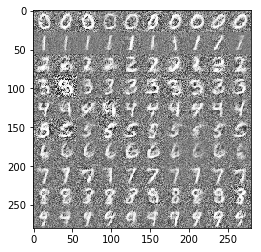

EPOCH 35 step 19150: D: loss = 1.3248117 G: loss=0.7589797 
EPOCH 35 step 19200: D: loss = 1.3333688 G: loss=0.7196577 
EPOCH 35 step 19250: D: loss = 1.3342623 G: loss=0.7994113 
EPOCH 35 step 19300: D: loss = 1.3085959 G: loss=0.7196971 
EPOCH 35 step 19350: D: loss = 1.3476547 G: loss=0.7201326 
EPOCH 35 step 19400: D: loss = 1.3515146 G: loss=0.7113278 
EPOCH 35 step 19450: D: loss = 1.3504770 G: loss=0.7189214 
EPOCH 35 step 19500: D: loss = 1.3586936 G: loss=0.6773493 
EPOCH 35 step 19550: D: loss = 1.3405805 G: loss=0.7704124 
EPOCH 35 step 19600: D: loss = 1.3478190 G: loss=0.7086182 
EPOCH 35 step 19650: D: loss = 1.3203025 G: loss=0.6999049 


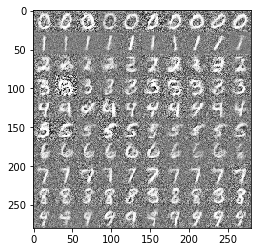

EPOCH 36 step 19700: D: loss = 1.3305999 G: loss=0.7367519 
EPOCH 36 step 19750: D: loss = 1.3142455 G: loss=0.7693954 
EPOCH 36 step 19800: D: loss = 1.3648791 G: loss=0.7412355 
EPOCH 36 step 19850: D: loss = 1.3433897 G: loss=0.7028483 
EPOCH 36 step 19900: D: loss = 1.3523746 G: loss=0.6829668 
EPOCH 36 step 19950: D: loss = 1.3673241 G: loss=0.7321829 
EPOCH 36 step 20000: D: loss = 1.2877264 G: loss=0.7629398 
EPOCH 36 step 20050: D: loss = 1.3108264 G: loss=0.7275910 
EPOCH 36 step 20100: D: loss = 1.3620322 G: loss=0.7349598 
EPOCH 36 step 20150: D: loss = 1.3459873 G: loss=0.7106760 
EPOCH 36 step 20200: D: loss = 1.3492641 G: loss=0.6904466 


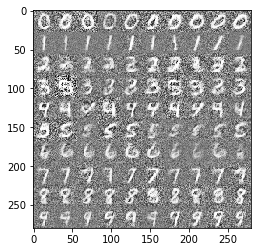

EPOCH 37 step 20250: D: loss = 1.3261120 G: loss=0.7155935 
EPOCH 37 step 20300: D: loss = 1.3345363 G: loss=0.7365233 
EPOCH 37 step 20350: D: loss = 1.3521488 G: loss=0.7101123 
EPOCH 37 step 20400: D: loss = 1.3305309 G: loss=0.7275250 
EPOCH 37 step 20450: D: loss = 1.3366157 G: loss=0.7444351 
EPOCH 37 step 20500: D: loss = 1.3418646 G: loss=0.6808970 
EPOCH 37 step 20550: D: loss = 1.3607568 G: loss=0.7051634 
EPOCH 37 step 20600: D: loss = 1.3039455 G: loss=0.7239007 
EPOCH 37 step 20650: D: loss = 1.3370070 G: loss=0.6477633 
EPOCH 37 step 20700: D: loss = 1.3231125 G: loss=0.7034276 


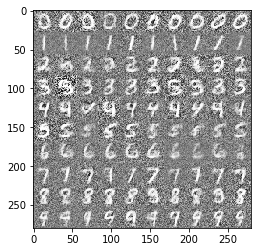

EPOCH 38 step 20750: D: loss = 1.3438544 G: loss=0.7162602 
EPOCH 38 step 20800: D: loss = 1.3296663 G: loss=0.7660351 
EPOCH 38 step 20850: D: loss = 1.3279824 G: loss=0.7199302 
EPOCH 38 step 20900: D: loss = 1.3464632 G: loss=0.7331257 
EPOCH 38 step 20950: D: loss = 1.3458745 G: loss=0.7314534 
EPOCH 38 step 21000: D: loss = 1.3284740 G: loss=0.7268331 
EPOCH 38 step 21050: D: loss = 1.3250828 G: loss=0.7089590 
EPOCH 38 step 21100: D: loss = 1.3654190 G: loss=0.7352158 
EPOCH 38 step 21150: D: loss = 1.3567773 G: loss=0.7008435 
EPOCH 38 step 21200: D: loss = 1.3485137 G: loss=0.7162358 
EPOCH 38 step 21250: D: loss = 1.3081412 G: loss=0.7303200 


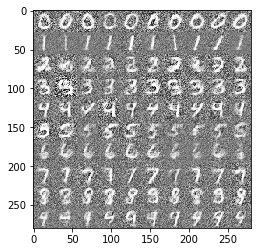

EPOCH 39 step 21300: D: loss = 1.3150308 G: loss=0.6924758 
EPOCH 39 step 21350: D: loss = 1.3505733 G: loss=0.7415921 
EPOCH 39 step 21400: D: loss = 1.3419590 G: loss=0.7154090 
EPOCH 39 step 21450: D: loss = 1.3145456 G: loss=0.6977617 
EPOCH 39 step 21500: D: loss = 1.3572772 G: loss=0.7240654 
EPOCH 39 step 21550: D: loss = 1.3397161 G: loss=0.7859558 
EPOCH 39 step 21600: D: loss = 1.3233026 G: loss=0.7660010 
EPOCH 39 step 21650: D: loss = 1.3640995 G: loss=0.7687931 
EPOCH 39 step 21700: D: loss = 1.3351057 G: loss=0.7462876 
EPOCH 39 step 21750: D: loss = 1.3466115 G: loss=0.7506884 
EPOCH 39 step 21800: D: loss = 1.3216730 G: loss=0.6967394 


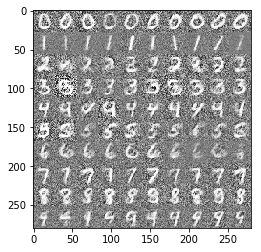

EPOCH 40 step 21850: D: loss = 1.3085018 G: loss=0.7850981 
EPOCH 40 step 21900: D: loss = 1.3175385 G: loss=0.7442789 
EPOCH 40 step 21950: D: loss = 1.3264798 G: loss=0.7348773 
EPOCH 40 step 22000: D: loss = 1.3038054 G: loss=0.7731930 
EPOCH 40 step 22050: D: loss = 1.3382130 G: loss=0.8058064 
EPOCH 40 step 22100: D: loss = 1.2956936 G: loss=0.7570137 
EPOCH 40 step 22150: D: loss = 1.3135018 G: loss=0.8094915 
EPOCH 40 step 22200: D: loss = 1.3306582 G: loss=0.7856482 
EPOCH 40 step 22250: D: loss = 1.3530512 G: loss=0.7180343 
EPOCH 40 step 22300: D: loss = 1.3344873 G: loss=0.6910969 
EPOCH 40 step 22350: D: loss = 1.3354498 G: loss=0.7347615 


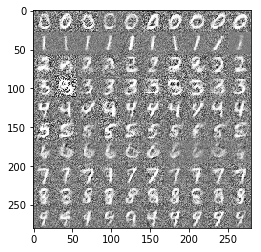

EPOCH 41 step 22400: D: loss = 1.2993329 G: loss=0.7275239 
EPOCH 41 step 22450: D: loss = 1.3304434 G: loss=0.7337955 
EPOCH 41 step 22500: D: loss = 1.2956481 G: loss=0.7777424 
EPOCH 41 step 22550: D: loss = 1.3289878 G: loss=0.7531049 
EPOCH 41 step 22600: D: loss = 1.3064642 G: loss=0.7842507 
EPOCH 41 step 22650: D: loss = 1.3370880 G: loss=0.7543288 
EPOCH 41 step 22700: D: loss = 1.3135118 G: loss=0.7600754 
EPOCH 41 step 22750: D: loss = 1.3298503 G: loss=0.7706740 
EPOCH 41 step 22800: D: loss = 1.3279572 G: loss=0.7691556 
EPOCH 41 step 22850: D: loss = 1.3054627 G: loss=0.8131356 
EPOCH 41 step 22900: D: loss = 1.2954109 G: loss=0.8052591 


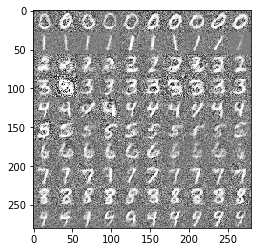

EPOCH 42 step 22950: D: loss = 1.3259188 G: loss=0.7795627 
EPOCH 42 step 23000: D: loss = 1.3816768 G: loss=0.7373012 
EPOCH 42 step 23050: D: loss = 1.3357284 G: loss=0.7504151 
EPOCH 42 step 23100: D: loss = 1.2916312 G: loss=0.8012454 
EPOCH 42 step 23150: D: loss = 1.3219938 G: loss=0.8060275 
EPOCH 42 step 23200: D: loss = 1.3590896 G: loss=0.7183852 
EPOCH 42 step 23250: D: loss = 1.3178535 G: loss=0.7636200 
EPOCH 42 step 23300: D: loss = 1.3514385 G: loss=0.7149510 
EPOCH 42 step 23350: D: loss = 1.3564152 G: loss=0.6734934 
EPOCH 42 step 23400: D: loss = 1.3181301 G: loss=0.7861788 
EPOCH 42 step 23450: D: loss = 1.3451213 G: loss=0.7633774 


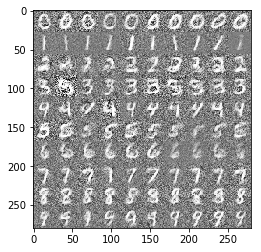

EPOCH 43 step 23500: D: loss = 1.3128854 G: loss=0.6860681 
EPOCH 43 step 23550: D: loss = 1.3312449 G: loss=0.7254402 
EPOCH 43 step 23600: D: loss = 1.3476549 G: loss=0.7944028 
EPOCH 43 step 23650: D: loss = 1.3271583 G: loss=0.7436312 
EPOCH 43 step 23700: D: loss = 1.3387673 G: loss=0.7661233 
EPOCH 43 step 23750: D: loss = 1.3452702 G: loss=0.6693906 
EPOCH 43 step 23800: D: loss = 1.3003917 G: loss=0.7393854 
EPOCH 43 step 23850: D: loss = 1.3362715 G: loss=0.7502009 
EPOCH 43 step 23900: D: loss = 1.2917318 G: loss=0.7730325 
EPOCH 43 step 23950: D: loss = 1.3119038 G: loss=0.8023984 
EPOCH 43 step 24000: D: loss = 1.3493097 G: loss=0.6669337 


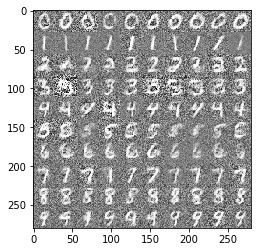

EPOCH 44 step 24050: D: loss = 1.3780046 G: loss=0.7595042 
EPOCH 44 step 24100: D: loss = 1.2978382 G: loss=0.7954688 
EPOCH 44 step 24150: D: loss = 1.2928960 G: loss=0.7751212 
EPOCH 44 step 24200: D: loss = 1.3284982 G: loss=0.7194048 
EPOCH 44 step 24250: D: loss = 1.3199205 G: loss=0.7236789 
EPOCH 44 step 24300: D: loss = 1.3360220 G: loss=0.7133294 
EPOCH 44 step 24350: D: loss = 1.3395673 G: loss=0.7046825 
EPOCH 44 step 24400: D: loss = 1.3668711 G: loss=0.6651620 
EPOCH 44 step 24450: D: loss = 1.3313725 G: loss=0.7474719 
EPOCH 44 step 24500: D: loss = 1.2894065 G: loss=0.7967029 
EPOCH 44 step 24550: D: loss = 1.3125825 G: loss=0.7759007 


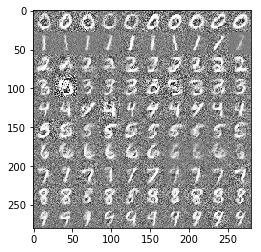

EPOCH 45 step 24600: D: loss = 1.2936934 G: loss=0.8121792 
EPOCH 45 step 24650: D: loss = 1.3037772 G: loss=0.7414261 
EPOCH 45 step 24700: D: loss = 1.3010129 G: loss=0.7245238 
EPOCH 45 step 24750: D: loss = 1.3265949 G: loss=0.7067149 
EPOCH 45 step 24800: D: loss = 1.3492284 G: loss=0.7029942 
EPOCH 45 step 24850: D: loss = 1.3192310 G: loss=0.7627652 
EPOCH 45 step 24900: D: loss = 1.2964387 G: loss=0.7419447 
EPOCH 45 step 24950: D: loss = 1.3473154 G: loss=0.6433310 
EPOCH 45 step 25000: D: loss = 1.3057175 G: loss=0.7713426 
EPOCH 45 step 25050: D: loss = 1.3245157 G: loss=0.7369201 
EPOCH 45 step 25100: D: loss = 1.3233180 G: loss=0.7234393 


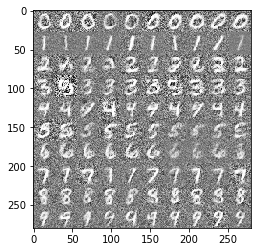

EPOCH 46 step 25150: D: loss = 1.3235623 G: loss=0.7144865 
EPOCH 46 step 25200: D: loss = 1.3407078 G: loss=0.7304814 
EPOCH 46 step 25250: D: loss = 1.3380846 G: loss=0.7372123 
EPOCH 46 step 25300: D: loss = 1.3246493 G: loss=0.8507854 
EPOCH 46 step 25350: D: loss = 1.3026865 G: loss=0.7514243 
EPOCH 46 step 25400: D: loss = 1.3208951 G: loss=0.7516944 
EPOCH 46 step 25450: D: loss = 1.3075911 G: loss=0.7634088 
EPOCH 46 step 25500: D: loss = 1.2970963 G: loss=0.7721791 
EPOCH 46 step 25550: D: loss = 1.3500774 G: loss=0.7351955 
EPOCH 46 step 25600: D: loss = 1.2923061 G: loss=0.7423916 
EPOCH 46 step 25650: D: loss = 1.3091489 G: loss=0.8151901 


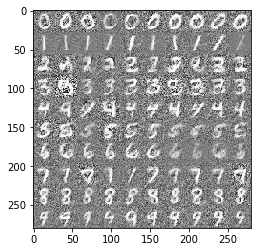

EPOCH 47 step 25700: D: loss = 1.2891312 G: loss=0.6966494 
EPOCH 47 step 25750: D: loss = 1.3431209 G: loss=0.7401105 
EPOCH 47 step 25800: D: loss = 1.3083270 G: loss=0.7489163 
EPOCH 47 step 25850: D: loss = 1.3134217 G: loss=0.7647790 
EPOCH 47 step 25900: D: loss = 1.3217194 G: loss=0.7244604 
EPOCH 47 step 25950: D: loss = 1.2971091 G: loss=0.8277898 
EPOCH 47 step 26000: D: loss = 1.3309777 G: loss=0.7846380 
EPOCH 47 step 26050: D: loss = 1.2952883 G: loss=0.7513437 
EPOCH 47 step 26100: D: loss = 1.3111633 G: loss=0.8216839 
EPOCH 47 step 26150: D: loss = 1.3217735 G: loss=0.7428383 
EPOCH 47 step 26200: D: loss = 1.3576541 G: loss=0.6775498 


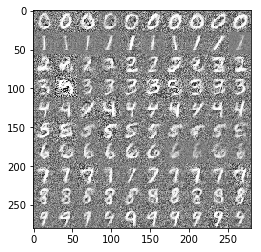

EPOCH 48 step 26250: D: loss = 1.3601801 G: loss=0.7021053 
EPOCH 48 step 26300: D: loss = 1.3612989 G: loss=0.7578713 
EPOCH 48 step 26350: D: loss = 1.3139849 G: loss=0.7958019 
EPOCH 48 step 26400: D: loss = 1.3086338 G: loss=0.7829079 
EPOCH 48 step 26450: D: loss = 1.3082318 G: loss=0.8117015 
EPOCH 48 step 26500: D: loss = 1.3142117 G: loss=0.7485896 
EPOCH 48 step 26550: D: loss = 1.2927976 G: loss=0.7798504 
EPOCH 48 step 26600: D: loss = 1.3288560 G: loss=0.7698057 
EPOCH 48 step 26650: D: loss = 1.3166399 G: loss=0.8269917 
EPOCH 48 step 26700: D: loss = 1.2893937 G: loss=0.7985986 
EPOCH 48 step 26750: D: loss = 1.3097668 G: loss=0.7029862 


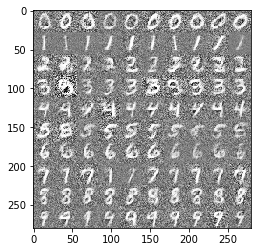

EPOCH 49 step 26800: D: loss = 1.3330661 G: loss=0.7332154 
EPOCH 49 step 26850: D: loss = 1.2932057 G: loss=0.7891473 
EPOCH 49 step 26900: D: loss = 1.3141658 G: loss=0.7693962 
EPOCH 49 step 26950: D: loss = 1.3412529 G: loss=0.7609732 
EPOCH 49 step 27000: D: loss = 1.2924272 G: loss=0.7721524 
EPOCH 49 step 27050: D: loss = 1.3137375 G: loss=0.7655941 
EPOCH 49 step 27100: D: loss = 1.3104396 G: loss=0.7778281 
EPOCH 49 step 27150: D: loss = 1.3127718 G: loss=0.7774631 
EPOCH 49 step 27200: D: loss = 1.3114059 G: loss=0.7218026 
EPOCH 49 step 27250: D: loss = 1.3371830 G: loss=0.7759709 
EPOCH 49 step 27300: D: loss = 1.3227568 G: loss=0.7752888 


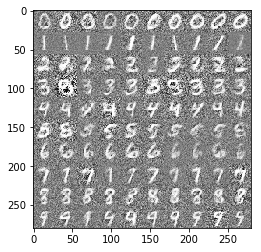

EPOCH 50 step 27350: D: loss = 1.3270490 G: loss=0.7976705 
EPOCH 50 step 27400: D: loss = 1.3402169 G: loss=0.8361499 
EPOCH 50 step 27450: D: loss = 1.3310380 G: loss=0.7929096 
EPOCH 50 step 27500: D: loss = 1.3189042 G: loss=0.7296623 
EPOCH 50 step 27550: D: loss = 1.3180128 G: loss=0.7425163 
EPOCH 50 step 27600: D: loss = 1.2855582 G: loss=0.7836917 
EPOCH 50 step 27650: D: loss = 1.3065627 G: loss=0.6540984 
EPOCH 50 step 27700: D: loss = 1.3457358 G: loss=0.7539189 
EPOCH 50 step 27750: D: loss = 1.3061256 G: loss=0.8019671 
EPOCH 50 step 27800: D: loss = 1.3369697 G: loss=0.7753850 


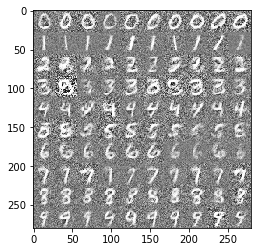

In [6]:
sample_z = np.random.uniform(-1 , 1 , size = [batch_size , sample_size])

y = tf.placeholder(tf.float32, [None , y_dim])

images = tf.placeholder(tf.float32, [batch_size, output_size, output_size, channel])

z = tf.placeholder(tf.float32, [None , sample_size])

fake_images = gern_net(batch_size, z , y ,sample_size, y_dim,output_size)

##the loss of gerenate network
D_pro , D_logits = dis_net(images, y ,  False)

G_pro, G_logits = dis_net(fake_images , y , True)

#### TODO ####
# DEFINE LOSS FUNCTION #
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logits, labels=tf.ones([batch_size, 1])))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=G_logits, labels=tf.zeros([batch_size, 1])))

D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=G_logits, labels=tf.ones([batch_size, 1])))

#############

t_vars = tf.trainable_variables()

d_var = [var for var in t_vars if 'dis' in var.name]
g_var = [var for var in t_vars if 'gen' in var.name]

opti_D = tf.train.AdamOptimizer(learning_rate=learning_rate , beta1=0.5).minimize(D_loss , var_list=d_var)
opti_G = tf.train.AdamOptimizer(learning_rate=learning_rate , beta1=0.5).minimize(G_loss , var_list=g_var)

init = tf.global_variables_initializer()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.Session(config=config) as sess:

    sess.run(init)
    e = 0
    step = 0

    while e <= EPOCH:
        batch_num = 0
        while batch_num < len(data_array) / batch_size - 1:

            step = step + 1

            realbatch_array , real_labels = getNext_batch(data_array , data_y , batch_num, batch_size)
            
            #Get the z
            batch_z = np.random.uniform(-1 , 1 , size=[batch_size , sample_size])

            _ = sess.run(opti_D, feed_dict={images:realbatch_array, z:batch_z , y:real_labels})
            _ = sess.run(opti_G, feed_dict={z: batch_z , y:real_labels})

            batch_num += 1

            if step % loss_step == 0:

                d_get_loss = sess.run(D_loss , feed_dict = {images:realbatch_array , z:batch_z , y:real_labels})
                g_get_loss = sess.run(G_loss , feed_dict = {z: batch_z , y:real_labels})
                print("EPOCH %d step %d: D: loss = %.7f G: loss=%.7f " % (e , step , d_get_loss , g_get_loss))

            if np.mod(step , display_step) == 1:

                sample_images = sess.run(fake_images , feed_dict={z:sample_z , y:sample_label(batch_size)})
                sample_images = sample_images[:100,:,:,:]
                image_name = './{}/train_{:02d}_{:04d}.png'.format(sample_dir , e , step)
                save_images(sample_images , [10,10] , image_name)

        img = mpimg.imread(image_name)
        imgplot = plt.imshow(img)
        plt.show()

        e = e + 1
        batch_num = 0
